In [1]:
# Keras实践——线性回归
import keras
import numpy as np
import matplotlib.pyplot as plt

In [46]:
#  ANN 人工神经网络(Artificial Neural Network，ANN)
'''载入数据'''
# 下面这个被开发者舍弃了已经
# from sklearn import datasets
# boston = datasets.load_boston()
# x,y = boston.data,boston.target
from sklearn.metrics import explained_variance_score
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
All_data=pd.read_csv("test_tree.csv")
data_train=All_data[All_data.date<15]
data_test=All_data[All_data.date>=15]
X_train=data_train.date[:,np.newaxis]
y_train=data_train.price
X_test=data_test.date[:,np.newaxis]
y_test=data_test.price[:,np.newaxis]

C:\Users\king\AppData\Local\Temp\ipykernel_16724\809902489.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train=data_train.date[:,np.newaxis]
C:\Users\king\AppData\Local\Temp\ipykernel_16724\809902489.py:16: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_test=data_test.date[:,np.newaxis]
C:\Users\king\AppData\Local\Temp\ipykernel_16724\809902489.py:17: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y_test=data_test.price[:,np.newaxis]


In [47]:
'''引入标准化函数'''
from sklearn import preprocessing
# 将数据的每一个特征缩放到给定的范围
x_MinMax = preprocessing.MinMaxScaler()
y_MinMax = preprocessing.MinMaxScaler()
''' 将 y 转换成 列 '''
import numpy as np
# len(y)是行，1是列
y = np.array(y_train).reshape(len(y_train),1)
'''标准化'''
X_train = x_MinMax.fit_transform(X_train.reshape(-1,1))
y_train = y_MinMax.fit_transform(y)
X_test = x_MinMax.fit_transform(X_test.reshape(-1,1))
y_test = y_MinMax.fit_transform(y_test.reshape(-1,1))

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#顺序模型
from keras.models import Sequential
#全连接层
from keras.layers import Dense
#构建一个顺序模型，构建神经网络
# Sequential模型可以构建非常复杂的神经网络，包括全连接神经网络、卷积神经网络(CNN)、循环神经网络(RNN)、等等。这里的Sequential更准确的应该理解为堆叠，通过堆叠许多层，构建出深度神经网络。
model = Sequential()
#在模型中添加一个全连接层
model.add(Dense(units=1,input_dim=1,name='dense'))
# 优化器选择的是 sgd 随机梯度下降 损失函数 是mse 均方误差
model.compile(optimizer='sgd',loss='mse')

In [49]:
for step in range(3001):
    #每次训练一个批次
    cost = model.train_on_batch(X_train,y_train)
    #每500次打印一下cost值
    if step %500 ==0:
        print("COST",cost)
#打印权值和偏执值
w,b = model.layers[0].get_weights()
# w参数的作用，我们可以得到，是决定那个分割平面的方向所在.分割平面的投影就是直线w1x1+w2x2+b=0
# b是决定竖直平面沿着垂直于直线方向移动的距离，当b>0的时候，直线往左边移动，当b<0的时候，直线往右边移动.
print("权值",w,"偏执值",b)

COST 1.0047974586486816
COST 0.03665817528963089
COST 0.00826982967555523
COST 0.001939505571499467
COST 0.0005279072793200612
COST 0.00021312864555511624
COST 0.00014293786080088466
权值 [[0.96953034]] 偏执值 [0.02058025]


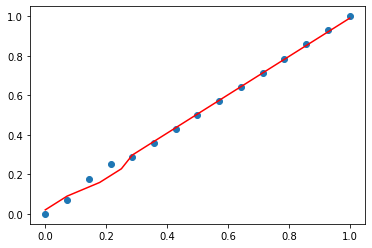

In [52]:
# x_data输入网络中，得到预测值
y_pred = model.predict(X_train)
#显示随机点
plt.scatter(X_train,y_train)
# 后面是y轴的范围
'''
format_string 由颜色字符、风格字符、标记字符组成
颜色字符
'b' 蓝色 'm' 洋红色 magenta
'g' 绿色 'y' 黄色
'r' 红色 'k' 黑色
'w' 白色 'c' 青绿色 cyan
'#008000' RGB某颜色 '0.8' 灰度值字符串
多条曲线不指定颜色时，会自动选择不同颜色
风格字符
'‐' 实线
'‐‐' 破折线
'‐.' 点划线
':' 虚线
'' ' ' 无线条
标记字符
'.' 点标记
',' 像素标记(极小点)
'o' 实心圈标记
'v' 倒三角标记
'^' 上三角标记
'>' 右三角标记
'<' 左三角标记...等等
'''
plt.plot(y_train,y_pred,'r-',0.8)
plt.show()

In [53]:
# 计算预测的分数
from sklearn.metrics import explained_variance_score
score=explained_variance_score(X_train,y_pred)
print('evs: %.2f%%'%(score*100.0))

evs: 99.91%


In [54]:
#随便测一个数据
a = np.array([0.2])
y3 = model.predict(a)
y3

array([[0.21448632]], dtype=float32)